In [1]:
import json

# Load SNLI dataset 
snli_data = []
with open('data.jsonl', 'r') as f: 
    for line in f:
        example = json.loads(line)
        snli_data.append(example)

# Print first 10 pairs in the specified format
for i in range(10):
    premise = snli_data[i]['sentence1']
    hypothesis = snli_data[i]['sentence2']
    label = snli_data[i]['gold_label']
    
    # Print reference, plagiarised, and label
    print(f"Reference: {premise}")
    print(f"Plagiarised: {hypothesis}")
    print(f"Label: {'Plagiarised' if label == 'entailment' else 'Not Plagiarised'}")
    print()


Reference: An older gentleman in an orange jumpsuit and gray hat is on the curb with a black trash bag and a broom.
Plagiarised: A man is cleaning up around his house.
Label: Not Plagiarised

Reference: Boy and girl running along the beach.
Plagiarised: Two people run on the beach.
Label: Plagiarised

Reference: Four men do repair work on a roof.
Plagiarised: Four men work with tools.
Label: Plagiarised

Reference: A long-haired young man skateboarding on the rails on a cloudy day.
Plagiarised: A girl is riding a bike.
Label: Not Plagiarised

Reference: A band performs on stage.
Plagiarised: People are listening to a rock concert.
Label: Not Plagiarised

Reference: A worker dressed in a clean suit polishes a large mirror.
Plagiarised: A worker enjoys cleaning.
Label: Not Plagiarised

Reference: Member of the Royals baseball team crossing the plate.
Plagiarised: The baseball team is winning.
Label: Not Plagiarised

Reference: Two Hispanic ladies wearing bright clothing are crossing the 

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to read JSON Lines file
def read_jsonl(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            example = json.loads(line)
            data.append(example)
    return data

# Tokenization
def tokenize(sentence):
    tokens = word_tokenize(sentence.lower())  # Convert to lowercase and tokenize
    tokens = [token for token in tokens if token.isalnum()]  # Keep only alphanumeric tokens
    return tokens



# Remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Stemming
def stem(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Lemmatization
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Preprocess a sentence
def preprocess(sentence):
    tokens = tokenize(sentence)
    tokens = remove_stopwords(tokens)
    lemmatized_tokens = lemmatize(tokens)
    return lemmatized_tokens

# Load SNLI dataset from JSON Lines file
snli_path = "data.jsonl"  
snli_data = read_jsonl(snli_path)

# Preprocess sentences and print the first 10 pairs
for i in range(10):
    premise = preprocess(snli_data[i]['sentence1'])
    hypothesis = preprocess(snli_data[i]['sentence2'])
    label = snli_data[i]['gold_label']
    
    # Print reference, plagiarised, and label
    print(f"Reference: {premise}")
    print(f"Plagiarised: {hypothesis}")
    print(f"Label: {'Plagiarised' if label == 'entailment' else 'Not Plagiarised'}")
    print()


[nltk_data] Downloading package punkt to /Users/inderere/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/inderere/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inderere/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Reference: ['older', 'gentleman', 'orange', 'jumpsuit', 'gray', 'hat', 'curb', 'black', 'trash', 'bag', 'broom']
Plagiarised: ['man', 'cleaning', 'around', 'house']
Label: Not Plagiarised

Reference: ['boy', 'girl', 'running', 'along', 'beach']
Plagiarised: ['two', 'people', 'run', 'beach']
Label: Plagiarised

Reference: ['four', 'men', 'repair', 'work', 'roof']
Plagiarised: ['four', 'men', 'work', 'tool']
Label: Plagiarised

Reference: ['young', 'man', 'skateboarding', 'rail', 'cloudy', 'day']
Plagiarised: ['girl', 'riding', 'bike']
Label: Not Plagiarised

Reference: ['band', 'performs', 'stage']
Plagiarised: ['people', 'listening', 'rock', 'concert']
Label: Not Plagiarised

Reference: ['worker', 'dressed', 'clean', 'suit', 'polish', 'large', 'mirror']
Plagiarised: ['worker', 'enjoys', 'cleaning']
Label: Not Plagiarised

Reference: ['member', 'royal', 'baseball', 'team', 'crossing', 'plate']
Plagiarised: ['baseball', 'team', 'winning']
Label: Not Plagiarised

Reference: ['two', 'hispa

In [3]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def read_jsonl(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            example = json.loads(line)
            data.append(example)
    return data

snli_path = "data.jsonl"  
snli_data = read_jsonl(snli_path)

# Extract sentences
sentences = [example['sentence1'] for example in snli_data] + [example['sentence2'] for example in snli_data]

# Vectorize sentences
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)  # Learn vocabulary and idf from all sentences.

# Function to find top N similar sentences in the original dataset to a query
def find_top_n_similar(query, tfidf_matrix, sentences, vectorizer, top_n=5):
    query_vector = vectorizer.transform([query])
    similarity_scores = cosine_similarity(query_vector, tfidf_matrix).flatten()
    top_n_indices = similarity_scores.argsort()[-top_n:][::-1]
    
    print(f"Query: {query}\n")
    print(f"Top {top_n} most similar sentences in corpus:")
    for idx in top_n_indices:
        print(f"{sentences[idx]} (Score: {similarity_scores[idx]:.4f})")

# Test the model with a query sentence
query_sentence = "A worker dressed in a clean suit polishes a large mirror."
find_top_n_similar(query_sentence, tfidf_matrix, sentences, vectorizer, top_n=5)


Query: A worker dressed in a clean suit polishes a large mirror.

Top 5 most similar sentences in corpus:
A worker dressed in a clean suit polishes a large mirror. (Score: 1.0000)
A man polishes shoes. (Score: 0.4871)
A clean-shaven man getting dressed in a purple shirt and tie in front of the mirror. (Score: 0.3706)
A worker is dressed in orange. (Score: 0.3594)
The boy is clean. (Score: 0.3433)


In [4]:
from sentence_transformers import SentenceTransformer, util
import json

# Load pre-trained BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  

# Function to read JSON Lines file
def read_jsonl(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            example = json.loads(line)
            data.append(example)
    return data

snli_path = "data.jsonl"  
snli_data = read_jsonl(snli_path)

# Extract sentences from the dataset
sentences = [example['sentence1'] for example in snli_data] + [example['sentence2'] for example in snli_data]

# Encode all sentences using Sentence-BERT
embeddings = model.encode(sentences, convert_to_tensor=True)

# Function to find top N similar sentences in the original dataset to a query using Sentence-BERT
def find_top_n_similar_sbert(query, embeddings, sentences, model, top_n=5):
    # Encode the query sentence using Sentence-BERT
    query_embedding = model.encode(query, convert_to_tensor=True)
    
    # Compute cosine similarities
    similarity_scores = util.pytorch_cos_sim(query_embedding, embeddings)[0]
    
    # Get the indices of the top N most similar sentences
    top_n_indices = similarity_scores.argsort(descending=True)[:top_n]
    
    print(f"Query: {query}\n")
    print(f"Top {top_n} most similar sentences in corpus:")
    for idx in top_n_indices:
        print(f"{sentences[idx]} (Score: {similarity_scores[idx]:.4f})")

# Test the model with a query sentence
query_sentence = "A worker dressed in a clean suit polishes a large mirror."
find_top_n_similar_sbert(query_sentence, embeddings, sentences, model, top_n=5)


/usr/local/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2024-09-01 18:11:57.162911: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Query: A worker dressed in a clean suit polishes a large mirror.

Top 5 most similar sentences in corpus:
A worker dressed in a clean suit polishes a large mirror. (Score: 1.0000)
A man is in front of a mirror. (Score: 0.7053)
a man is at the mirror (Score: 0.6934)
A man shaving in the mirror. (Score: 0.6804)
A man is shaving in a mirror. (Score: 0.6695)


In [9]:
import numpy as np

# Calculate average cosine similarity for TF-IDF vectors
avg_tfidf_similarity = np.mean(tfidf_similarity)
print("Average cosine similarity for TF-IDF vectors:", avg_tfidf_similarity)

# Calculate average cosine similarity for BERT embeddings
avg_bert_similarity = np.mean(bert_similarity)
print("Average cosine similarity for BERT embeddings:", avg_bert_similarity)


Average cosine similarity for TF-IDF vectors: 0.02673089779382669
Average cosine similarity for BERT embeddings: 0.79225385


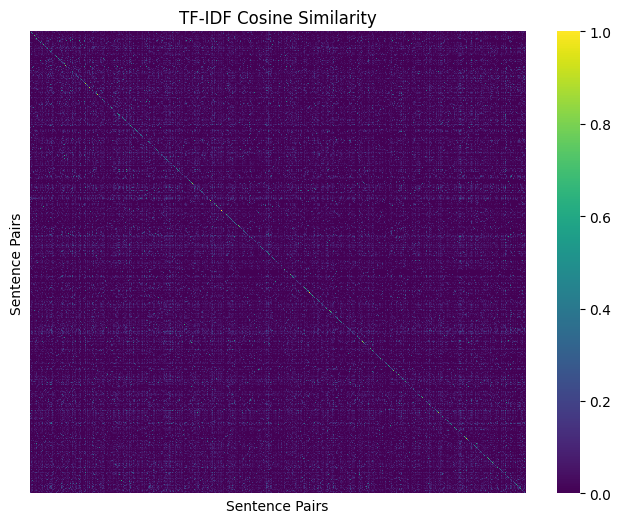

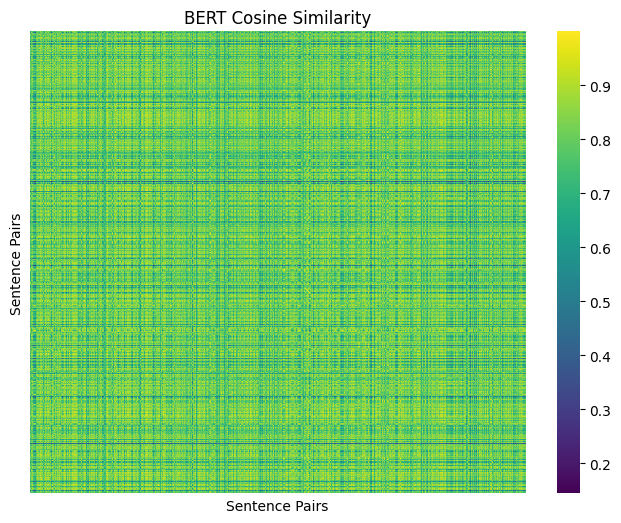

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmap for TF-IDF cosine similarity
plt.figure(figsize=(8, 6))
sns.heatmap(tfidf_similarity, cmap='viridis', annot=False, xticklabels=False, yticklabels=False)
plt.title('TF-IDF Cosine Similarity')
plt.xlabel('Sentence Pairs')
plt.ylabel('Sentence Pairs')
plt.show()

# Plot heatmap for BERT cosine similarity
plt.figure(figsize=(8, 6))
sns.heatmap(bert_similarity, cmap='viridis', annot=False, xticklabels=False, yticklabels=False)
plt.title('BERT Cosine Similarity')
plt.xlabel('Sentence Pairs')
plt.ylabel('Sentence Pairs')
plt.show()
